In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#### Fig.1-a

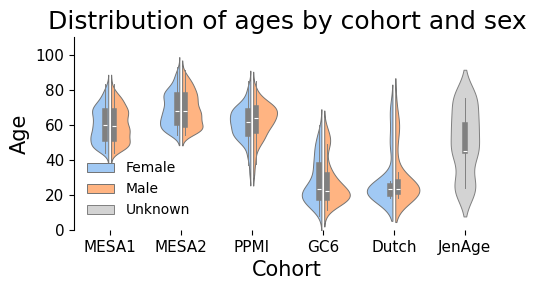

In [8]:
rna_age=pd.read_csv('./fig_data/1a.csv', index_col=None)

rna_cohort_order=['MESA1', 'MESA2', 'PPMI', 'GC6', 'Dutch', 'JenAge']
cohort_full = 'JenAge'
data_full = rna_age[rna_age['cohort'] == cohort_full]
data_rest = rna_age[rna_age['cohort'] != cohort_full]

rna_age['sex'] = pd.Categorical(rna_age['sex'], categories=['Female', 'Male'], ordered=True)
rna_age = rna_age.sort_values('sex')

fig, ax=plt.subplots(figsize=(5.5, 2.5))
# plt.figure(figsize=(6, 3))
sns.violinplot(data=data_rest, x='cohort', y='age', hue='sex', split=True,  gap=.1, inner='box', \
               linewidth=0.7, saturation=4, palette='pastel', order=rna_cohort_order, density_norm='area',\
              inner_kws=dict(box_width=4, whis_width=0.7, color='gray'), ax=ax)

sns.violinplot(data=data_full, x='cohort', y='age', hue='sex',inner='box', palette=['lightgray'],\
               linewidth=0.7, saturation=4, split=False, width=0.4,\
               inner_kws=dict(box_width=4, whis_width=0.7, color='gray'),ax=ax)

# Add labels and title
plt.title('Distribution of ages by cohort and sex', fontsize=18)
plt.xlabel('Cohort', fontsize='15')
plt.ylabel('Age', fontsize='15')
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black') 

plt.ylim(0,110)

plt.legend(loc='lower left', frameon=False)
plt.grid(False)
plt.savefig('rna_age_cohort_sex.png', bbox_inches='tight', dpi=300)
plt.show()

#### Fig.1-b

['SYT11' 'PRSS23' 'ADGRG1' 'FCRL6' 'FGFBP2']
['SYT11', 'PRSS23', 'ADGRG1', 'FCRL6', 'FGFBP2']


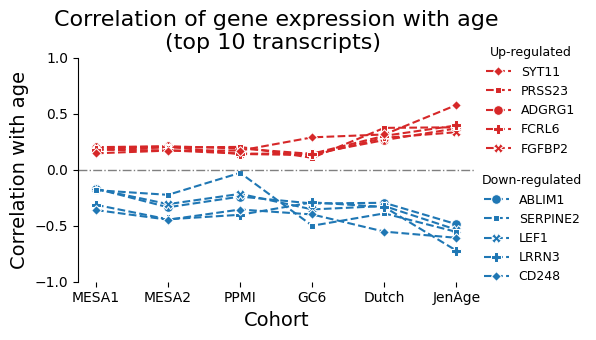

In [28]:
top_rna = pd.read_csv('./fig_data/1b.csv', index_col=None)
top_rna.rename(columns={'gen': 'gene'}, inplace=True)
# top_rna.head(5)


up_top_rna=top_rna[top_rna['top10']=='up']
down_top_rna=top_rna[top_rna['top10']=='down']


up_gene_counts = up_top_rna.groupby('gene')['cohort'].nunique()
up_common_genes = up_gene_counts[up_gene_counts == len(up_top_rna['cohort'].unique())].index
up_common_top_rna = up_top_rna[up_top_rna['gene'].isin(up_common_genes)]
len(up_common_genes)

down_gene_counts = down_top_rna.groupby('gene')['cohort'].nunique()
down_common_genes = down_gene_counts[down_gene_counts == len(down_top_rna['cohort'].unique())].index
down_common_top_rna = down_top_rna[down_top_rna['gene'].isin(down_common_genes)]
len(down_common_genes)

up_common_top_rna['cohort'] = pd.Categorical(up_common_top_rna['cohort'], categories=rna_cohort_order, ordered=True)
up_common_top_rna = up_common_top_rna.sort_values('cohort')
up_mean_correlation = up_common_top_rna.groupby('gene')['cor'].mean().reset_index()
up_mean_correlation_sorted = up_mean_correlation.sort_values(by='cor', ascending=True)
up_top_genes=up_mean_correlation_sorted['gene'][-5:][::-1].values
cmap = sns.color_palette("tab10", 10)  
# up_cmap = sns.color_palette("muted", n_colors=len(up_top_genes))
up_gene_colors = dict(zip(up_top_genes, 5*[sns.color_palette("tab10")[3]]))#dict(zip(up_top_genes, cmap[:5]))


down_common_top_rna['cohort'] = pd.Categorical(down_common_top_rna['cohort'], categories=rna_cohort_order, ordered=True)
down_common_top_rna = down_common_top_rna.sort_values('cohort')
down_mean_correlation = down_common_top_rna.groupby('gene')['cor'].mean().reset_index()
down_mean_correlation_sorted = down_mean_correlation.sort_values(by='cor', ascending=False)
# print(down_mean_correlation_sorted)
down_top_genes=down_mean_correlation_sorted['gene'][-5:].values
down_cmap = sns.color_palette("bright", n_colors=len(down_top_genes))
down_gene_colors = dict(zip(down_top_genes, 5*[sns.color_palette("tab10",4)[0]]))#dict(zip(down_top_genes, cmap[5:]))

fig=plt.figure(figsize=(6,3.5))

# ax=sns.lineplot(data=up_common_top_rna[~(up_common_top_rna['gene'].isin(up_top_genes))], x='cohort', y='cor', hue='gene', marker='o', palette=['gray'], err_style=None, sort=False, linewidth=0.15, markersize=2.5)
ax=sns.lineplot(data=up_common_top_rna[up_common_top_rna['gene'].isin(up_top_genes)], x='cohort', y='cor', \
                style='gene', markers=True, hue='gene', palette=up_gene_colors, sort=False, linewidth=1.5, markersize=7)

# ax=sns.lineplot(data=down_common_top_rna[~(down_common_top_rna['gene'].isin(down_top_genes))], x='cohort', y='cor', hue='gene', marker='o', palette=['gray'], err_style=None, sort=False, linewidth=0.15, markersize=2.5)
ax=sns.lineplot(data=down_common_top_rna[down_common_top_rna['gene'].isin(down_top_genes)], x='cohort', y='cor', \
                style='gene', markers=True, hue='gene', palette=down_gene_colors, sort=False, linewidth=1.5,markersize=7)

for i in range(len(ax.lines)):
    ax.lines[i].set_linestyle("--")


# up_legend_elements = [plt.Line2D([0], [0], marker='^', color='w', label=gene, markerfacecolor=color, markersize=7) 
#                    for gene, color in up_gene_colors.items()]
# plt.legend(handles=up_legend_elements, title='Up-Regulated', bbox_to_anchor=(0.97, 1), loc='upper left')
handles, labels = ax.get_legend_handles_labels()

handles_up = []
labels_up = []
handles_down = []
labels_down = []

for handle, label in zip(handles, labels):
    if label in up_top_genes:
        handles_up.append(handle)
        labels_up.append(label)
    else:
        handles_down.append(handle)
        labels_down.append(label)
        
handles_up_sorted = [h for gene in up_top_genes for h, l in zip(handles_up, labels_up) if l == gene]
labels_up_sorted = [gene for gene in up_top_genes for l in labels_up if l == gene]

handles_down_sorted = [h for gene in down_top_genes for h, l in zip(handles_down, labels_down) if l == gene]
labels_down_sorted = [gene for gene in down_top_genes for l in labels_down if l == gene]

print(up_top_genes)
print(labels_up_sorted)
plt.legend(handles=handles_up_sorted, labels=labels_up_sorted, title='Up-regulated', bbox_to_anchor=(1, 1.1), loc='upper left',frameon=False, title_fontsize=9,fontsize=9)



# down_legend_elements = [plt.Line2D([0], [0], marker='v', color='w', label=gene, markerfacecolor=color, markersize=7) 
#                    for gene, color in down_gene_colors.items()]
# fig.legend(handles=down_legend_elements, title='Down-Regulated',bbox_to_anchor=(1.015, 0.56))
fig.legend(handles=handles_down_sorted, labels=labels_down_sorted, title='Down-regulated', bbox_to_anchor=(0.792, 0.52), loc='upper left',frameon=False, title_fontsize=9,fontsize=9)



        
plt.title('Correlation of gene expression with age\n(top 10 transcripts) ', fontsize='16')
plt.xlabel('Cohort', fontsize='14')
plt.ylabel('Correlation with age', fontsize='14')
# plt.xticks(fontsize='14')
# plt.yticks(fontsize='14')
plt.ylim(-1,1)
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.grid(False)
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
# plt.gca().spines['left'].set_linewidth(1) 
plt.gca().spines['left'].set_color('black') 
plt.axhline(y=0, color='gray', linestyle='-.', linewidth=1)
plt.savefig('RNA Expression.png', bbox_inches='tight', dpi=300)
plt.show()


#### Fig.1-c

<Figure size 300x400 with 0 Axes>

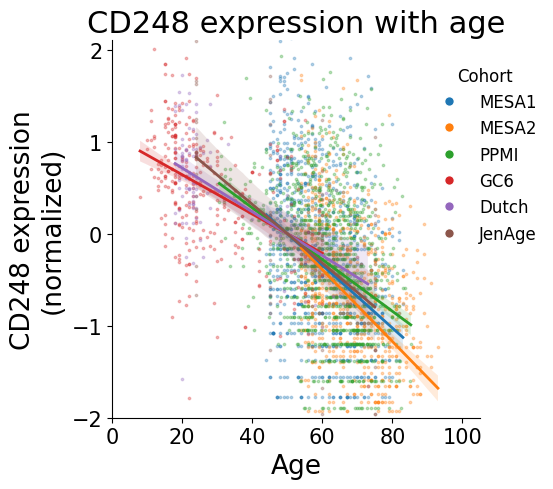

In [29]:
cd248 = pd.read_csv('./fig_data/1c.csv', index_col=None)
cd248['ENSG00000174807']=np.log(cd248['ENSG00000174807']+1)
cd248_cohort_order=['MESA1', 'MESA2', 'PPMI', 'GC6', 'Dutch', 'JenAge']
cd248['cohort'] = pd.Categorical(cd248['cohort'], categories=cd248_cohort_order, ordered=True)
cd248 = cd248.sort_values('cohort')

age=50

for cohort in cd248_cohort_order:
    slope, intercept, r_value, p_value, std_err = stats.linregress(cd248[cd248['cohort']==cohort]['age'],cd248[cd248['cohort']==cohort]['ENSG00000174807'])
    cd248_expr = slope * age + intercept
    cd248.loc[cd248['cohort']==cohort, 'ENSG00000174807'] -= cd248_expr


plt.figure(figsize=(3, 4))
custom_palette = sns.color_palette('tab10')

lm=sns.lmplot(data=cd248, x='age', y='ENSG00000174807', hue='cohort', palette=custom_palette, hue_order=cd248_cohort_order, \
           scatter_kws={'s': 3, 'alpha': 0.3}, legend=False, \
           ci=95, line_kws={'linewidth': 2, 'alpha': 1})


plt.title('CD248 expression with age', fontsize=22)
plt.xlabel('Age', fontsize=19)
plt.ylabel('CD248 expression\n(normalized)', fontsize=19)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.tight_layout()
plt.xlim(0,105)
plt.ylim(-2,2.1)
plt.yticks(np.arange(-2.0,2.01,1.0))

markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=7, alpha=1, label=f'{cohort}') for cohort, color in zip(cd248_cohort_order, custom_palette)]
plt.legend(handles=markers, title='Cohort', bbox_to_anchor=(0.83, 0.97), frameon=False, title_fontsize=12,fontsize=12)

plt.savefig('cd248.png', bbox_inches='tight', dpi=300)
plt.show()


#### Fig.1-d

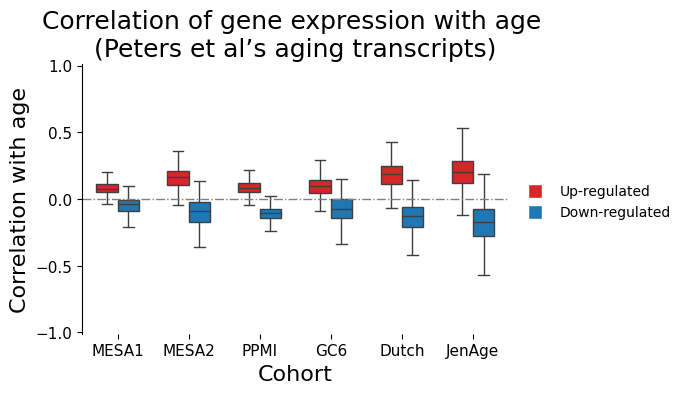

In [33]:
top_rna=pd.read_csv('./fig_data/1d.csv', index_col=None)
rna_cohort_order=['MESA1', 'MESA2', 'PPMI', 'GC6', 'Dutch', 'JenAge']
top_rna['cohort'] = pd.Categorical(top_rna['cohort'], categories=rna_cohort_order, ordered=True)
top_rna = top_rna.sort_values('cohort')

fig=plt.figure(figsize=(5.5, 3.5))
palette = { 'up': sns.color_palette("tab10")[3], 'down': sns.color_palette("tab10")[0] }
legend_labels=['Up-regulated','Down-regulated']

sns.boxplot(data=top_rna, x='cohort', y='cor', hue='proposed', width=0.6,\
            palette=palette, saturation=1,showfliers=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black') 


markers = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, alpha=1, label=f'{l}') for l, color in zip(legend_labels, palette.values())]
plt.legend(handles=markers, bbox_to_anchor=(1, 0.6), frameon=False)

plt.title('Correlation of gene expression with age \n(Peters et al’s aging transcripts)', fontsize=18)
plt.xlabel('Cohort', fontsize=16)
plt.ylabel('Correlation with age', fontsize=16)
plt.ylim(-1.01,1.01)
plt.yticks(np.arange(-1,1.01,0.5))
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')

plt.grid(False)
plt.axhline(y=0, color='gray', linestyle='-.', linewidth=1)
plt.savefig('rna_cor_box.png', bbox_inches='tight', dpi=300)
plt.show()

#### Fig.1-e

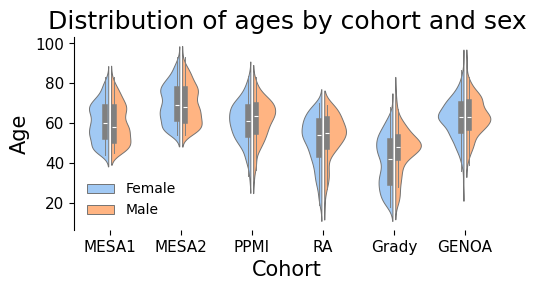

In [41]:
dna_age=pd.read_csv('./fig_data/1e.csv', index_col=None)
dna_cohort_order=['MESA1', 'MESA2', 'PPMI', 'RA', 'Grady', 'GENOA']
dna_age=dna_age[dna_age['cohort'].isin(dna_cohort_order)]

dna_age['sex'] = pd.Categorical(dna_age['sex'], categories=['Female', 'Male'], ordered=True)
dna_age = dna_age.sort_values('sex')

fig, ax=plt.subplots(figsize=(5.5, 2.5))
sns.violinplot(data=dna_age, x='cohort', y='age', hue='sex', split=True,  gap=.1, inner='box', \
               linewidth=0.7, saturation=1, palette='pastel', order=dna_cohort_order, density_norm='area',\
              inner_kws=dict(box_width=4, whis_width=0.7, color='gray'), ax=ax)
# Add labels and title
plt.title('Distribution of ages by cohort and sex', fontsize=18)
plt.xlabel('Cohort', fontsize='15')
plt.ylabel('Age', fontsize='15')

plt.xticks(fontsize='11')
plt.yticks(fontsize='11')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black') 

plt.legend(loc='lower left', frameon=False)
plt.grid(False)
plt.savefig('dna_age_cohort_sex.png', bbox_inches='tight', dpi=300)
plt.show()

#### Fig.1-f

/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_47617/4294741262.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_common_top_dna['cohort'] = pd.Categorical(up_common_top_dna['cohort'], categories=dna_cohort_order, ordered=True)
/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_47617/4294741262.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_common_top_dna['cohort'] = pd.Categorical(down_common_top_dna['cohort'], categories=dna_cohort_order, ordered=True)


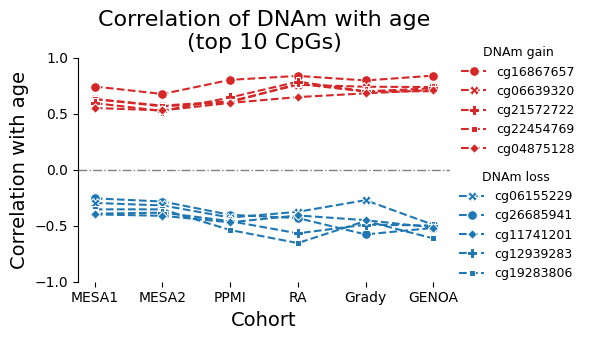

In [50]:
top_dna = pd.read_csv('./fig_data/1f.csv', index_col=None)
top_dna.rename(columns={'Unnamed: 0': 'cpg'}, inplace=True)
dna_cohort_order=['MESA1', 'MESA2', 'PPMI', 'RA', 'Grady', 'GENOA']
top_dna=top_dna[top_dna['cohort'].isin(dna_cohort_order)]
top_dna.head(10)
up_top_dna=top_dna[top_dna['top10']=='up']
down_top_dna=top_dna[top_dna['top10']=='down']

up_cpg_counts = up_top_dna.groupby('cpg')['cohort'].nunique()
up_common_cpgs = up_cpg_counts[up_cpg_counts == len(up_top_dna['cohort'].unique())].index
up_common_top_dna = up_top_dna[up_top_dna['cpg'].isin(up_common_cpgs)]

down_cpg_counts = down_top_dna.groupby('cpg')['cohort'].nunique()
down_common_cpgs = down_cpg_counts[down_cpg_counts == len(down_top_dna['cohort'].unique())].index
down_common_top_dna = down_top_dna[down_top_dna['cpg'].isin(down_common_cpgs)]


up_common_top_dna['cohort'] = pd.Categorical(up_common_top_dna['cohort'], categories=dna_cohort_order, ordered=True)
up_common_top_dna = up_common_top_dna.sort_values('cohort')
up_mean_correlation = up_common_top_dna.groupby('cpg')['cor'].mean().reset_index()
up_mean_correlation_sorted = up_mean_correlation.sort_values(by='cor', ascending=True)
up_top_cpgs=up_mean_correlation_sorted['cpg'][-5:][::-1].values
cmap = sns.color_palette("tab10", 10)  
up_cpg_colors = dict(zip(up_top_cpgs, 5*[sns.color_palette("tab10",4)[3]]))#dict(zip(up_top_cpgs, cmap[:5]))


down_common_top_dna['cohort'] = pd.Categorical(down_common_top_dna['cohort'], categories=dna_cohort_order, ordered=True)
down_common_top_dna = down_common_top_dna.sort_values('cohort')
down_mean_correlation = down_common_top_dna.groupby('cpg')['cor'].mean().reset_index()
down_mean_correlation_sorted = down_mean_correlation.sort_values(by='cor', ascending=False)
down_top_cpgs=down_mean_correlation_sorted['cpg'][-5:].values
down_cpg_colors = dict(zip(down_top_cpgs, 5*[sns.color_palette("tab10")[0]]))#dict(zip(down_top_cpgs, cmap[5:]))

fig=plt.figure(figsize=(6,3.5))
unique_cpg_values = up_common_top_dna['cpg'].unique()

ax = sns.lineplot(data=up_common_top_dna[up_common_top_dna['cpg'].isin(up_top_cpgs)], 
                  x='cohort', y='cor', style='cpg', markers=True,
                  hue='cpg', palette=up_cpg_colors, sort=False, 
                  linewidth=1.5, markersize=7)
ax = sns.lineplot(data=down_common_top_dna[down_common_top_dna['cpg'].isin(down_top_cpgs)], 
                  x='cohort', y='cor', style='cpg', markers=True,
                  hue='cpg', palette=down_cpg_colors, sort=False, 
                  linewidth=1.5, markersize=7)
for i in range(len(ax.lines)):
    ax.lines[i].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()


handles_up = []
labels_up = []
handles_down = []
labels_down = []

for handle, label in zip(handles, labels):
    if label in up_top_cpgs:
        handles_up.append(handle)
        labels_up.append(label)
    else:
        handles_down.append(handle)
        labels_down.append(label)
        
handles_up_sorted = [h for cpg in up_top_cpgs for h, l in zip(handles_up, labels_up) if l == cpg]
labels_up_sorted = [cpg for cpg in up_top_cpgs for l in labels_up if l == cpg]

handles_down_sorted = [h for cpg in down_top_cpgs for h, l in zip(handles_down, labels_down) if l == cpg]
labels_down_sorted = [cpg for cpg in down_top_cpgs for l in labels_down if l == cpg]


plt.legend(handles=handles_up_sorted, labels=labels_up_sorted, title='DNAm gain', bbox_to_anchor=(1, 1.1), loc='upper left', frameon=False, title_fontsize=9,fontsize=9)


fig.legend(handles=handles_down_sorted, labels=labels_down_sorted, title='DNAm loss', bbox_to_anchor=(0.755, 0.53), loc='upper left', frameon=False, title_fontsize=9,fontsize=9)


plt.title('Correlation of DNAm with age\n(top 10 CpGs)', fontsize='16')
plt.xlabel('Cohort', fontsize='14')
plt.ylabel('Correlation with age', fontsize='14')
# plt.xticks(fontsize='12')
# plt.yticks(fontsize='12')
plt.ylim(-1,1)
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.grid(False)
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
# plt.gca().spines['left'].set_linewidth(1) 
plt.gca().spines['left'].set_color('black') 
plt.axhline(y=0, color='gray', linestyle='-.', linewidth=1)
plt.savefig('DNA Methylation.png', bbox_inches='tight', dpi=300)
plt.show()


#### Fig.1-g

<Figure size 300x400 with 0 Axes>

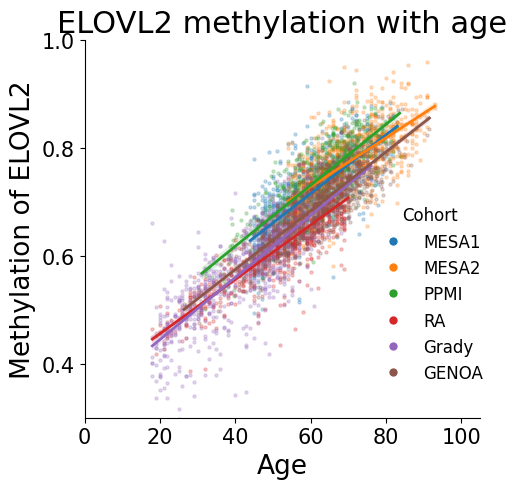

In [4]:
elovl2 = pd.read_csv('./fig_data/1g.csv', index_col=None)
elovl2_cohort_order=['MESA1', 'MESA2', 'PPMI', 'RA', 'Grady', 'GENOA']
elovl2=elovl2[elovl2['cohort'].isin(elovl2_cohort_order)]

elovl2['cohort'] = pd.Categorical(elovl2['cohort'], categories=elovl2_cohort_order, ordered=True)
elovl2 = elovl2.sort_values('cohort')


plt.figure(figsize=(3, 4))
# custom_palette = sns.color_palette('bright', 6)

lm=sns.lmplot(data=elovl2, x='age', y='cg16867657', hue='cohort', palette='tab10', hue_order=elovl2_cohort_order, \
           scatter_kws={'s': 5, 'alpha': 0.24}, legend=False, \
           ci=95, line_kws={'linewidth': 2, 'alpha': 1})

# Add labels and title
plt.title('ELOVL2 methylation with age', fontsize=22)
plt.xlabel('Age', fontsize=19)
plt.ylabel('Methylation of ELOVL2', fontsize=19)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
# plt.ylim(-1,1)
plt.yticks([0.2,0.4,0.6,0.8,1.0])
# plt.grid(True)
plt.tight_layout()
plt.xlim(0,105)
plt.ylim(0.3,1)
# Show plot
# plt.legend(title='Cohort', loc='center right', markerscale=3)

# markers = [mpatches.Patch(color=color, label=f'Cohort {cohort}', alpha=0.7) for cohort, color in zip(cd248['cohort'].unique(), sns.color_palette('Set1', n_colors=len(cd248['cohort'].unique())))]
# plt.legend(handles=markers, loc='upper right', title='Cohort', markerscale=2)

markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=7, alpha=1, label=f'{cohort}') for cohort, color in zip(elovl2_cohort_order, sns.color_palette('tab10', n_colors=6))]
# plt.legend(handles=markers, title='Cohort', loc='best')
plt.legend(handles=markers, title='Cohort', bbox_to_anchor=(0.7, 0.6), frameon=False, title_fontsize=12,fontsize=12)

plt.savefig('elovl2.png', bbox_inches='tight', dpi=300)
plt.show()


#### Fig.1-h

/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_48251/2614813333.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  top_dna = pd.read_csv('./fig_data/1h.csv', index_col=None)


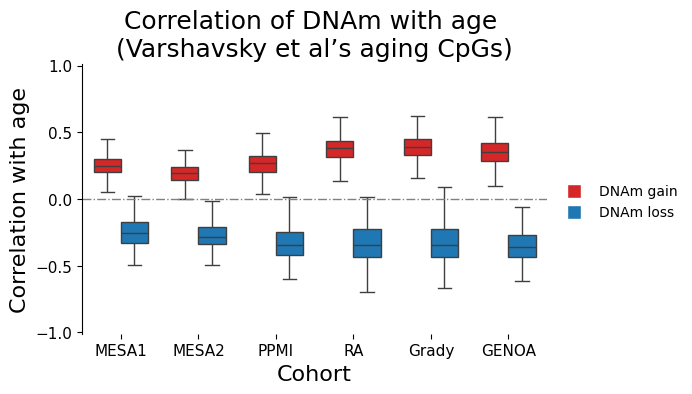

In [6]:

top_dna = pd.read_csv('./fig_data/1h.csv', index_col=None)
top_dna.rename(columns={'Unnamed: 0': 'cpg'}, inplace=True)
dna_cohort_order=['MESA1', 'MESA2', 'PPMI', 'RA', 'Grady', 'GENOA']
top_dna=top_dna[top_dna['cohort'].isin(dna_cohort_order)]

fig=plt.figure(figsize=(6, 3.5))
palette = { 'up': sns.color_palette("tab10")[3], 'down': sns.color_palette("tab10")[0] }
legend_labels=['DNAm gain','DNAm loss']

sns.boxplot(data=top_dna, x='cohort', y='cor', hue='proposed', width=0.7,\
            palette=palette, saturation=1,showfliers=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('black') 


markers = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, alpha=1, label=f'{l}') for l, color in zip(legend_labels, palette.values())]
plt.legend(handles=markers, bbox_to_anchor=(1, 0.6), frameon=False)

plt.title('Correlation of DNAm with age \n(Varshavsky et al’s aging CpGs)', fontsize=18)
plt.xlabel('Cohort', fontsize=16)
plt.ylabel('Correlation with age', fontsize=16)
plt.ylim(-1.01,1.01)
plt.yticks(np.arange(-1,1.01,0.5))
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')

plt.grid(False)
plt.axhline(y=0, color='gray', linestyle='-.', linewidth=1)
plt.savefig('dna_cor_box.png', bbox_inches='tight', dpi=300)
plt.show()